# Problem 1 

### Block 1: Import libraries and set random seed

In this block, we import required Python libraries: `numpy` for numerical computation and `matplotlib` for plotting. We also set the random seed using `np.random.seed()` to ensure the simulation results are reproducible.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set random seeds for reproducibility
np.random.seed(20231024)


### Block 2: Define sigmoid function and the neural network forward pass

We define the sigmoid activation function, which is used in all hidden layers and the output layer in the binary classification case. Then, we implement the forward pass of a feedforward neural network with:
- Two hidden layers with 4 nodes each
- Sigmoid activation for hidden layers
- Either identity (regression) or sigmoid (classification) activation for the output layer
The function takes an input `x`, a list of weight matrices and bias vectors `theta`, and a flag `is_classification` to toggle between regression and classification behavior.


In [20]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Manual forward pass through 2 hidden layers (each with 4 nodes) and output layer
def neural_network_forward(x, theta, is_classification=False):
    W1, b1, W2, b2, W3, b3 = theta
    z1 = sigmoid(x @ W1 + b1)
    z2 = sigmoid(z1 @ W2 + b2)
    out = z2 @ W3 + b3
    return sigmoid(out) if is_classification else out


### Block 3: Generate neural network parameters θ from a standard normal prior

This block generates a fixed set of parameters (weights and biases) for the network. Each parameter is sampled independently from a standard normal distribution N(0,1), as specified in the problem. The parameters are kept fixed for all simulated data points to ensure consistency across samples.


In [21]:
# Network dimensions
D_in = 2     # input dimension
H1 = H2 = 4  # hidden layer sizes
D_out = 1    # output

# Fixed random θ ~ N(0, I)
theta = [
    np.random.randn(D_in, H1),     # W1
    np.random.randn(1, H1),        # b1
    np.random.randn(H1, H2),       # W2
    np.random.randn(1, H2),        # b2
    np.random.randn(H2, D_out),    # W3
    np.random.randn(1, D_out)      # b3
]

### Block 4: Simulate input and output data

We generate 100 data points:
- Inputs `x_i` are sampled from a 2-dimensional standard normal distribution N(0, I)
- Noise `ε_i` is sampled from N(0, 0.5)
- For **regression**, the output `y_i = f(x_i; θ) + ε_i` where the network has a linear output
- For **binary classification**, the network output is a probability `f(x_i; θ) ∈ [0, 1]`, and `y_i ∈ {0, 1}` is drawn from a Bernoulli distribution based on that probability


In [32]:
# Simulate 100 data points
n = 100
X = np.random.randn(n, 2)                           # x_i ~ N(0, I)
epsilon = np.random.normal(0, 0.5, (n, 1))          # ε_i ~ N(0, 0.5)

# Regression target: y_i = f(x_i; θ) + ε_i
y_regression = neural_network_forward(X, theta, is_classification=False) + epsilon

# Binary classification target: P(y_i=1) = f(x_i; θ)
p = neural_network_forward(X, theta, is_classification=True)
y_classification = np.random.binomial(1, p).reshape(-1, 1)


### Block 5: 3D Scatter Plot of Simulated Regression Data

In this block, we visualize the simulated regression data by plotting each data point in 3D space. 
Each point represents an input-output pair \((x_1, x_2, y)\), where:
- \(x_1\) and \(x_2\) are the two input features drawn from a standard normal distribution
- \(y\) is the corresponding target generated by the neural network with added noise

This 3D scatter plot provides a more complete view of how the output depends on both input variables.


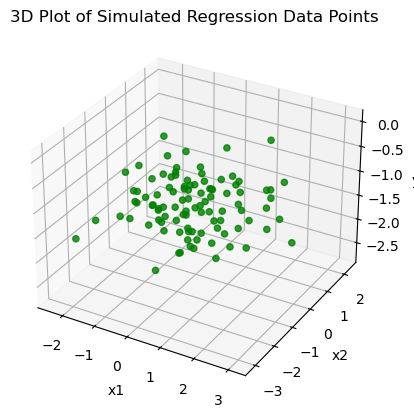

In [29]:
# --- 3D scatter plot of the actual data points ---
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y_regression.flatten(), c='green', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Plot of Simulated Regression Data Points')
plt.show()


### Block 6: 2D Scatter Plot of Simulated Classification Data

In this block, we visualize the binary classification data by plotting each input point in 2D space using its two features \((x_1, x_2)\). 
Each point is colored according to its class label (0 or 1), with:
- Blue representing class 0
- Red representing class 1

This allows us to see how the neural network separates the input space into different regions based on the fixed parameters. A legend is included to clarify which color corresponds to which class.


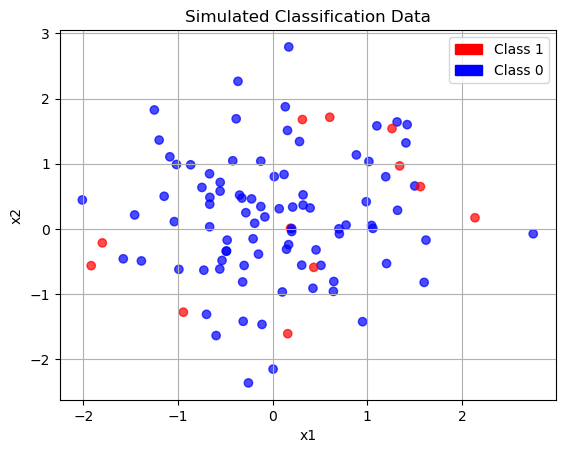

In [36]:
plt.figure(dpi=100)
plt.title("Simulated Classification Data")
plt.scatter(X[:, 0], X[:, 1], c=y_classification.flatten(), cmap='bwr', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
# Manually create legend handles
red_patch = mpatches.Patch(color='red', label='Class 1')
blue_patch = mpatches.Patch(color='blue', label='Class 0')
plt.legend(handles=[red_patch, blue_patch], loc="best")
plt.show()

# Problem 2

### Block 1: Import Libraries and Set Random Seed

We begin by importing the required Python libraries:

- `numpy`: for numerical operations and data generation  
- `tensorflow`: for building and training neural network models using Keras API  
- `sklearn.metrics.mean_squared_error`: to evaluate model performance on the test set  
- `pandas`: to organize and display results in a table

We also set fixed random seeds for both NumPy and TensorFlow to ensure reproducibility. This guarantees that the randomly generated data and model initialization are consistent every time we run the notebook.


In [65]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import pandas as pd

# Reproducibility
np.random.seed(20231024)
tf.random.set_seed(20231024)

### Block 2: Generate Synthetic Dataset

We simulate a regression dataset using the function:
\[
y = \sin(x) + x + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 0.2^2)
\]
The dataset is split into:
- **Training set** (used to fit the models)
- **Validation set** (used to monitor performance during training)
- **Test set** (used to evaluate generalization after training)


In [60]:
# Generate data
X_train = np.random.random(100).reshape((-1,1)) * 2 * np.pi - np.pi
eps_train = np.random.normal(0, 0.2, (100, 1))
y_train = np.sin(X_train) + X_train + eps_train

X_valid = np.random.random(50).reshape((-1,1)) * 2 * np.pi - np.pi
eps_valid = np.random.normal(0, 0.2, (50, 1))
y_valid = np.sin(X_valid) + X_valid + eps_valid

X_test = np.random.random(50).reshape((-1,1)) * 2 * np.pi - np.pi
eps_test = np.random.normal(0, 0.2, (50, 1))
y_test = np.sin(X_test) + X_test + eps_test


### Block 3: Define Activation Functions

We define a dictionary that maps the names of four common activation functions to their TensorFlow equivalents:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU

These will be used in the hidden layer of each feedforward neural network model.


In [61]:
# Dictionary of activation functions
activations = {
    "sigmoid": "sigmoid",
    "tanh": "tanh",
    "relu": "relu",
    "leaky_relu": tf.keras.layers.LeakyReLU()
}


### Block 4: Configure Training Parameters

We define training settings:
- `EPOCHS`: Maximum number of training iterations
- `PATIENCE`: For early stopping — training halts if validation loss doesn’t improve over 10 epochs
- `results`: An empty list to store performance metrics for each model


In [69]:
# Training settings
EPOCHS = 2000
PATIENCE = 10
results = []


### Block 5: Train and Evaluate Each Model

We loop through each activation function to:
1. Build a neural network with one hidden layer of 20 units
2. Compile the model using the Adam optimizer and MSE loss
3. Train using early stopping based on validation loss
4. Evaluate the final model on the test set
5. Record number of epochs until convergence and test MSE


In [70]:
for name, activation in activations.items():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(20, activation=activation),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results.append({
        "Activation": name,
        "Epochs to Converge": len(history.history["loss"]),
        "Test MSE": mse
    })


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


### Block 6: Display Comparison Table

We convert the results into a DataFrame and display a table comparing:
- Activation function used
- Number of epochs to convergence (early stopping)
- Final MSE on the test dataset


In [71]:
df_results = pd.DataFrame(results)
print(df_results)


   Activation  Epochs to Converge  Test MSE
0     sigmoid                1362  0.041324
1        tanh                 596  0.041603
2        relu                1268  0.043227
3  leaky_relu                1581  0.043533


# Problem 3

### Step 1: Import Libraries and Set Random Seed

We begin by importing essential Python libraries:

- `numpy` for numerical computations and generating random data  
- `tensorflow` for constructing and training the neural network  
- `matplotlib.pyplot` for data visualization   
- `sklearn.metrics.roc_curve` and `auc` for evaluating classification performance using ROC curves  

We also fix the random seed for NumPy and TensorFlow to ensure reproducibility across runs.


In [18]:
# Step 1: Import libraries and set random seed
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import roc_curve, auc
np.random.seed(20231024)
tf.random.set_seed(20231024)

### Step 2: Generate Synthetic Classification Dataset

We generate **1,000 two-dimensional data points** from a standard normal distribution:

$$
\mathbf{x}_i \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) \quad \text{for } i = 1, \dots, 1000
$$

Each point is assigned a binary label based on its Euclidean norm:

$$
y_i = 
\begin{cases}
1 & \text{if } \|\mathbf{x}_i\|_2 \leq 1 \quad \text{(inside the unit circle)} \\
0 & \text{otherwise}
\end{cases}
$$

This setup defines a **circular decision boundary** in 2D input space.  
Our goal is to later train a neural network that approximates this boundary using a **triangular region** formed by intersecting halfspaces.


In [19]:
# Step 2: Generate data
n = 1000
X = np.random.randn(n, 2)
y = (np.linalg.norm(X, axis=1) <= 1).astype(int)

### Step 3: Build Neural Network to Approximate Triangular Region

This step defines the core neural architecture, using binary logic to form a triangle-like decision region. We use:

- A **custom `sign` activation function** with a surrogate gradient (straight-through estimator) to allow training via backpropagation.
- A **hinge loss** suited for binary classification with outputs in \{-1, +1\}.
- A **hidden layer with 3 trainable neurons**, each learning a linear boundary (interpretable as half-spaces).
- A **fixed output layer acting as an AND gate**, which activates only when all 3 hidden conditions are satisfied (i.e., inside the triangle).

In [20]:
# Step 3: Build neural network to approximate triangular region
# === Custom sign activation with surrogate gradient ===
@tf.custom_gradient
def sign_with_surrogate(x):
    y = tf.sign(x)
    def grad(dy):
        return dy * tf.cast(tf.abs(x) <= 1.0, tf.float32)  # Straight-through estimator
    return y, grad

def sign_activation(x):
    return sign_with_surrogate(x)

# === Binary hinge loss for {-1, +1} output ===
def hinge_loss(y_true, y_pred):
    y_true = 2.0 * tf.cast(y_true, tf.float32) - 1.0  # Convert {0,1} → {-1,+1}
    return tf.reduce_mean(tf.maximum(0.0, 1.0 - y_true * y_pred))

# === Build model ===
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(3, activation=sign_activation, name='hidden'),
    tf.keras.layers.Dense(1, activation=sign_activation, name='output')  # fixed AND gate
])

# === Initialize and fix output layer weights: weights=[1,1,1], bias=-2 (AND gate)
model.build()
W_output = np.ones((3, 1))   # shape (3 hidden units → 1 output)
b_output = np.array([-2.0])  # AND threshold: sum must be 3 → bias = -2
model.get_layer('output').set_weights([W_output, b_output])
model.get_layer('output').trainable = False  # freeze logic gate

### Step 4: Train the Model

In this step, we compile and train the model. Since the network outputs values in \{-1, +1\}, we use a **hinge loss** function, which is appropriate for binary classification in that range. The optimizer is set to **Adam** with a learning rate of 0.1 to accelerate convergence. We train the model for up to 500 epochs with a batch size of 256.

To prevent overfitting and reduce unnecessary computation, we include **early stopping**. Training will automatically stop if the loss does not improve for 10 consecutive epochs, and the best weights encountered during training will be restored.

In [21]:
# Step 4: Train the Model
# === Compile and train ===
# Define early stopping callback
early_stop = EarlyStopping(
    monitor='loss',           # monitor training loss
    patience=10,              # stop if no improvement for 10 consecutive epochs
    restore_best_weights=True,
    verbose=1
)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=hinge_loss,
              metrics=['accuracy'])

# Fit with early stopping
history = model.fit(X, y,
                    epochs=500,
                    batch_size=256,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6379 - loss: 0.7242 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7169 - loss: 0.5662 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.3907 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8868 - loss: 0.2264 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8651 - loss: 0.2698 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8773 - loss: 0.2455 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8895 - loss: 0.2211 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8844 - loss: 0.2313 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8840 - loss: 0.2320 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8907 - loss: 0.2186 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8904 - loss: 0.2192 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9012 - lo

### Step 5: Plot the Learning Curve

After training the model, we visualize how the loss change over epochs to assess the learning dynamics.


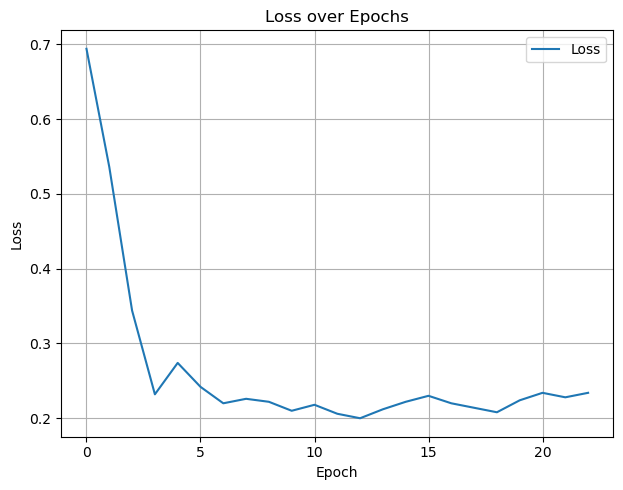

In [22]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Step 6: Visualize Classification Results

We use the trained model to compute **predicted probabilities** for each input point. To convert these into binary class labels, we apply a **fixed threshold of 0.5**:

$$
\text{Predicted class} =
\begin{cases}
1 & \text{if } \hat{y}_i \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

This is the standard threshold used in binary classification with sigmoid or hard-sigmoid outputs, ensuring clear decision boundaries.

We then visualize:

- A **scatter plot** where each point is colored by the predicted class label, highlighting the **triangular decision region** learned by the network.
- A **reference plot** overlaying the **true unit circle** and original ground truth labels to compare the learned boundary with the actual circular region.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


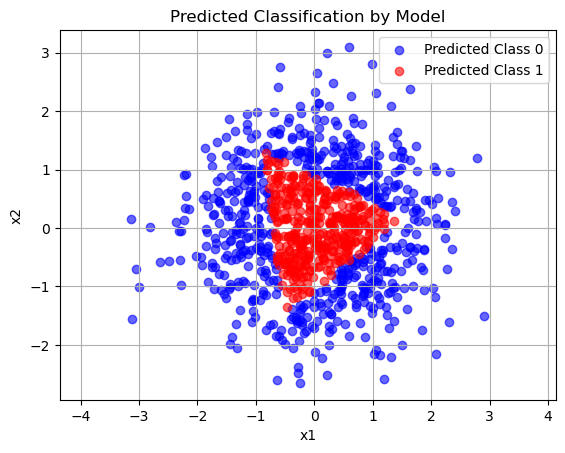

In [23]:
# Step 5: Predict and visualize
# Determine threshold based on class 1 ratio
y_pred_prob = model.predict(X).flatten()
threshold = 0.5
# Apply threshold to predicted probabilities
y_pred_class = (y_pred_prob >= threshold).astype(int)

# Split predicted classes
class_0 = X[y_pred_class == 0]
class_1 = X[y_pred_class == 1]

plt.figure(dpi=100)
plt.title("Predicted Classification by Model")

# Plot each class with separate label
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', alpha=0.6, label='Predicted Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', alpha=0.6, label='Predicted Class 1')

plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

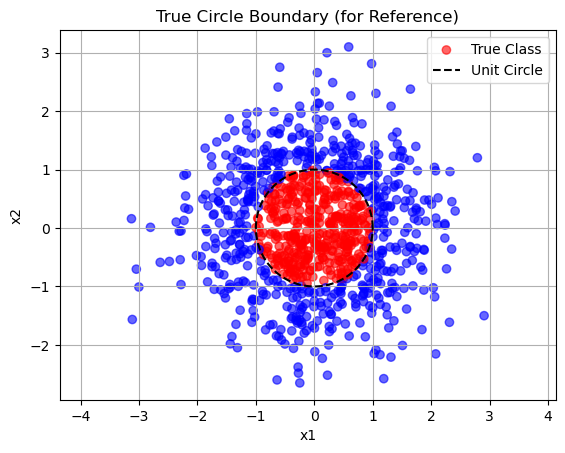

In [24]:
# Ground truth plot with circle boundary
theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
plt.figure(dpi=100)
plt.title("True Circle Boundary (for Reference)")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, label='True Class')
plt.plot(circle_x, circle_y, 'k--', label='Unit Circle')
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

### Step 7: Visualize Decision Region vs True Circular Boundary

We first create a dense grid over the 2D input space and use the trained model to predict class probabilities. We then visualize the region where the model predicts class 1 using a filled contour plot, and compare it to the true unit circle boundary (ground truth).

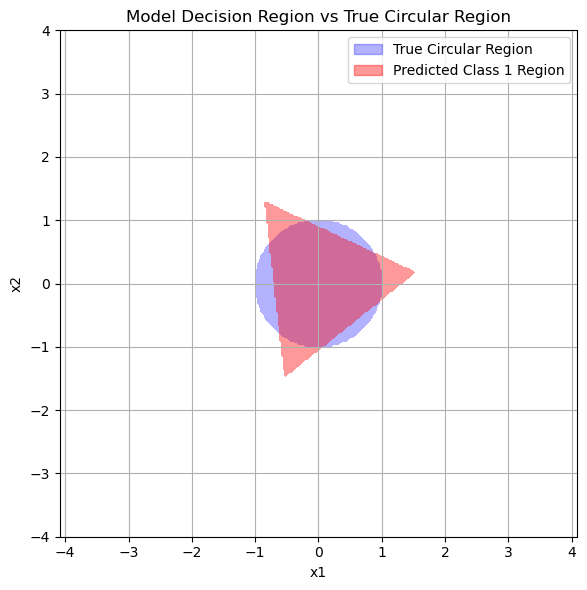

In [25]:
# Step 6: Create meshgrid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(-4, 4, 300), np.linspace(-4, 4, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)

# Compute true circular region: x² + y² ≤ 1
circle_region = (xx**2 + yy**2 <= 1).astype(float)

# Step 6: Plot the predicted decision region + true circle
plt.figure(dpi=100, figsize=(6, 6))

# Plot the true circular region (in blue)
plt.contourf(xx, yy, circle_region, levels=[0.5, 1], colors=['blue'], alpha=0.3)

# Plot the model's predicted decision region (in red)
plt.contourf(xx, yy, probs, levels=[threshold, 1], colors=['red'], alpha=0.4)

# Create legend handles for contour regions
blue_patch = mpatches.Patch(color='blue', alpha=0.3, label='True Circular Region')
red_patch = mpatches.Patch(color='red', alpha=0.4, label='Predicted Class 1 Region')

# Plot formatting
plt.title("Model Decision Region vs True Circular Region")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.grid(True)
plt.legend(handles=[blue_patch, red_patch], loc='upper right')
plt.tight_layout()
plt.show()


### Step 8: Plot ROC Curve

We evaluate the classifier's performance using the **ROC (Receiver Operating Characteristic) curve**, which shows the trade-off between the **true positive rate (TPR)** and the **false positive rate (FPR)** across different thresholds.

The ROC curve is computed by:
1. Predicting **probabilities** (not binary labels) using the trained model.
2. Using `roc_curve()` to calculate FPR, TPR, and threshold values.
3. Plotting the curve along with the **AUC (Area Under Curve)** score to measure overall performance.

An AUC near **1.0** indicates excellent classification, while an AUC around **0.5** suggests random guessing.

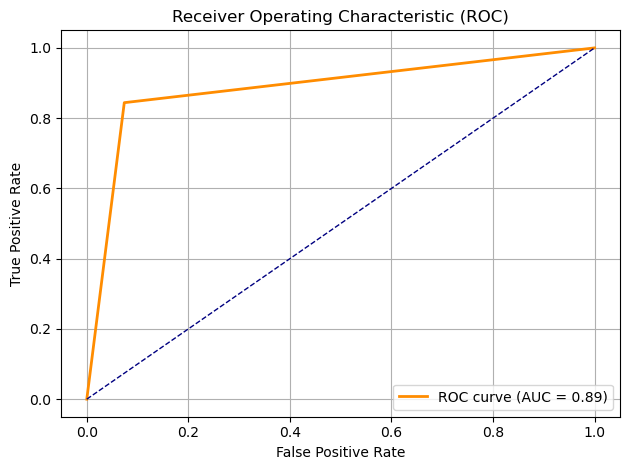

In [26]:
# Predict class probabilities (not binary labels)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # diagonal line (random)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()